# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# Pandas for data handling
import pandas as pd

# NumPy for numerical computations
import numpy as np

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Ensures that Matplotlib plots are displayed inline in the notebook
%matplotlib inline

# Seaborn for statistical data visualization
import seaborn as sns

---
## A. Project Description


In [4]:
student_name = "Shashikanth Senthil Kumar"
student_id = "25218722"
group_id = "9"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [7]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [8]:
business_use_case_description = """
Use an ensemble method that handles nonlinear relationships and interactions between features. 
Random Forests can identify the most important variables driving draft likelihood while reducing overfitting risk.

Hypothesis:
A Random Forest model will outperform Decision Tree Classifier by capturing complex patterns in player stats, 
while highlighting the most influential predictors via feature importance.
"""

In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
business_objectives = """
Accurate results will allow teams to prioritize scouting resources toward players with a higher probability of being drafted, improving the quality of draft selections and reducing wasted time and investment. 
Incorrect results, however, may cause teams to overlook valuable players or over-invest in players with a low chance of success, leading to financial loss, missed opportunities, and reduced team performance.
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
stakeholders_expectations_explanations = """
The results will be used to guide scouting and recruitment strategies.
The primary users of the predictions will be NBA teams, talent scouts, sports analysts, and team management. 
Indirectly, players themselves and their agents may also be impacted, as draft predictions can influence career opportunities, negotiations, and visibility in the draft process.
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [14]:
# Load the datasets
X_train = pd.read_csv('../data_shash/X_train.csv')
y_train = pd.read_csv('../data_shash/y_train.csv')
X_val = pd.read_csv('../data_shash/X_val.csv')
y_val = pd.read_csv('../data_shash/y_val.csv')
X_test = pd.read_csv('../data_shash/X_test.csv')
y_test = pd.read_csv('../data_shash/y_test.csv')

---
## D. Feature Selection


### D.1 Final Selection of Features

In [15]:
# The final selected features are
features_list = ['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'ht', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'player_id', 'drafted'] 

### D.2 Final Selection of Features after feature engineering

In [16]:
# The final features after feature engineering
final_features = ['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'height_cm','Height_Impact', 'REB_per', 
       'FT_efficiency', 'player_id', 'drafted']

In [17]:
feature_selection_explanations = """
We are using the same set of features as in Experiment 0 to maintain consistency and to ensure that model performance variations are due to the logistic regression model and not from feature changes.
"""

In [18]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Use Datacheck to Ensure there is no Null values in the Datasets

In [19]:
# Import custom data checking function
from shash import datacheck

In [20]:
datacheck(X_train)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,41
Ortg,float64,0,0.0,1236
REB_per,float64,0,0.0,684
Height_Impact,float64,0,0.0,9781
height_cm,float64,0,0.0,30
pts,float64,0,0.0,3121
blk,float64,0,0.0,646
gbpm,float64,0,0.0,9752
bpm,float64,0,0.0,9747
porpag,float64,0,0.0,9751


In [21]:
datacheck(y_train)

,dtype,missing_count,missing_percent,unique_values
drafted,float64,0,0.0,2
----------------,----------------,----------------,----------------,----------------
Number of,duplicate,rows,present:,9780


In [22]:
datacheck(X_val)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,40
Ortg,float64,0,0.0,806
REB_per,float64,0,0.0,473
Height_Impact,float64,0,0.0,2446
height_cm,float64,0,0.0,25
pts,float64,0,0.0,1338
blk,float64,0,0.0,368
gbpm,float64,0,0.0,2445
bpm,float64,0,0.0,2445
porpag,float64,0,0.0,2443


In [23]:
datacheck(y_val)

,dtype,missing_count,missing_percent,unique_values
drafted,float64,0,0.0,2
----------------,----------------,----------------,----------------,----------------
Number of,duplicate,rows,present:,2444


In [24]:
datacheck(X_test)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,34
Ortg,float64,0,0.0,615
REB_per,float64,0,0.0,399
Height_Impact,float64,0,0.0,1292
height_cm,float64,0,0.0,22
pts,float64,0,0.0,808
blk,float64,0,0.0,244
gbpm,float64,0,0.0,1297
bpm,float64,0,0.0,1297
porpag,float64,0,0.0,1293


In [25]:
datacheck(y_test)

,dtype,missing_count,missing_percent,unique_values
player_id,object,0,0.0,1297
----------------,----------------,----------------,----------------,----------------
No duplicate,rows,found,in the,dataset


In [26]:
data_cleaning_explanations = """
Missing values can lead to inaccuracies in data analysis and model predictions. 
In this dataset, there were no missing values in any of the training, validation, or test sets ensuring completeness and reliability for further analysis.
Ignore the duplicates on test sets as they are reflecting the drafted player status.
"""

In [27]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_explanations)

---
## F. Feature Engineering

In [28]:
feature_engineering_explanations = """
For this experiment (the Random Forest Classifier), no feature engineering is performed. 
We are using the same features as the baseline model, and thus, no interaction terms or additional features were created. 
This maintains consistency in feature selection and ensures comparability of results between the models.
"""

In [29]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_explanations)

---
## G. Data Preparation for Modeling

### G.1 Data Transformation "Flatten Target Variables"

In [30]:
# Check the shape of the y_train
y_train.shape

(9782, 1)

In [31]:
# Convert y dataframes to 1D arrays
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

In [32]:
# Check the shape of the y_train
y_train.shape

(9782,)

In [33]:
data_transformation_1_explanations = """
The target variable 'drafted' was originally in a column vector shape (n_samples, 1), which is not compatible with many scikit-learn models. 
Flattening the target to a 1-dimensional array ensures proper input format for training and evaluation functions. 
This transformation allows models like Logistic Regression to correctly interpret the labels, avoids warnings during fitting, and ensures consistent behavior across cross-validation and predictions.
"""

In [34]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

---
## H. Save Datasets


The Datasets are already saved

---
## I. Selection of Performance Metrics


In [35]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, ConfusionMatrixDisplay,
    classification_report
)

In [36]:
performance_metrics_explanations = """
For this NBA draft prediction task, multiple performance metrics are considered to provide a well-rounded evaluation. 
Accuracy alone may not be sufficient, especially if the dataset is imbalanced (i.e., fewer players get drafted compared 
to those who don’t). Therefore, precision, recall, and F1-score are included to better capture the trade-offs between 
false positives and false negatives. 

- Precision: helps us understand how many of the players predicted as drafted are actually drafted, which is important 
  when we want to minimize false positives. 
- Recall tells us how many of the actual drafted players were correctly identified, which is critical if the goal is 
  to avoid missing potential talents. 
- F1-score balances precision and recall, making it a strong overall measure when both false positives and false negatives 
  are costly. 
- ROC-AUC is included to evaluate the model’s ability to discriminate between drafted and not drafted players across 
  different thresholds. 
- Confusion Matrix provides a clear breakdown of true positives, true negatives, false positives, and false negatives 
  for better interpretability. 

Using these combined metrics gives a more complete view of model performance and ensures that the evaluation is not biased 
towards a single aspect of prediction.
"""


In [37]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

---
## J. Train Machine Learning Model

### J.1 Import Algorithm


In [38]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Initialize base model
rf = RandomForestClassifier(random_state=42)

In [40]:
algorithm_selection_explanations = """
Random Forest is a strong candidate for this problem because it is an ensemble method
that combines multiple decision trees, reducing the risk of overfitting while improving
predictive performance. It handles non-linear relationships, interactions between features,
and class imbalance effectively. Additionally, it provides feature importance scores,
helping identify the most influential player statistics for draft predictions.
"""

In [41]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters



In [42]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

In [43]:
hyperparameters_selection_explanations = """
These hyperparameters control model complexity and generalization:
- n_estimators: Number of trees, more trees improve stability but increase computation.
- max_depth: Limits how deep each tree can grow, reducing overfitting risk.
- min_samples_split & min_samples_leaf: Control minimum samples needed for splits/leaves,
  helping prevent overly specific patterns.
- max_features: Adds randomness at split level, improving ensemble diversity.
- class_weight: Balances the skewed drafted vs non-drafted class distribution.
"""

In [44]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [45]:
# Import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [46]:
# GridSearchCV setup with ROC AUC as metric
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get best model
best_rf_model = grid_search_rf.best_estimator_

print("Best Parameters:", grid_search_rf.best_params_)
print("Best ROC AUC Score (CV):", grid_search_rf.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 500}
Best ROC AUC Score (CV): 0.9761961804790751


### J.4 Model Technical Performance


In [47]:
# ✅ Get predicted labels
y_pred_train = best_rf_model.predict(X_train)
y_pred_val = best_rf_model.predict(X_val)

# ✅ Get predicted probabilities (only needed for ROC AUC, log loss, etc.)
y_proba_train = best_rf_model.predict_proba(X_train)[:, 1]  # probability of class 1
y_proba_val = best_rf_model.predict_proba(X_val)[:, 1]  # probability of class 1

In [48]:
# Import Custom Package for evaluation
from shash import evaluate_model


--- Train Set Evaluation ---
Accuracy : 0.9680
Precision: 0.2056
Recall   : 1.0000
F1 Score : 0.3411
ROC AUC  : 0.9932

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      9701
         1.0       0.21      1.00      0.34        81

    accuracy                           0.97      9782
   macro avg       0.60      0.98      0.66      9782
weighted avg       0.99      0.97      0.98      9782

Confusion Matrix (Raw Counts):
[[9388  313]
 [   0   81]]


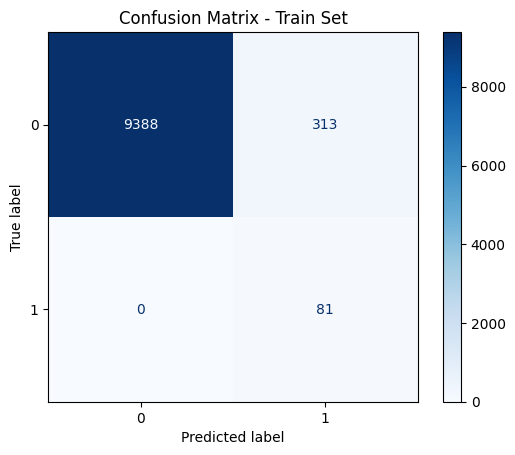

In [49]:
# Train evaluation
evaluate_model(y_train, y_pred_train, y_proba_train, dataset_name="Train Set")


--- Validation Set Evaluation ---
Accuracy : 0.9697
Precision: 0.1705
Recall   : 0.9375
F1 Score : 0.2885
ROC AUC  : 0.9891

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2430
         1.0       0.17      0.94      0.29        16

    accuracy                           0.97      2446
   macro avg       0.59      0.95      0.64      2446
weighted avg       0.99      0.97      0.98      2446

Confusion Matrix (Raw Counts):
[[2357   73]
 [   1   15]]


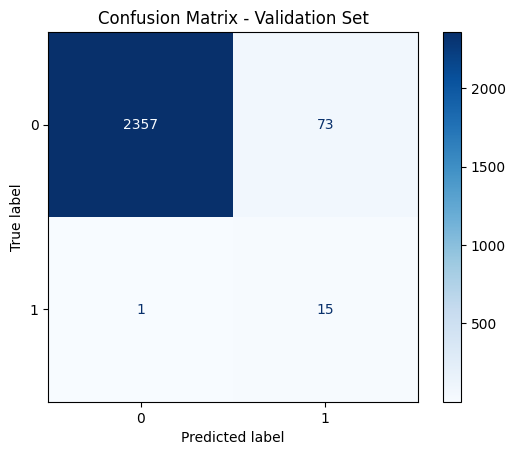

In [50]:
# Validation evaluation
evaluate_model(y_val, y_pred_val, y_proba_val, dataset_name="Validation Set")

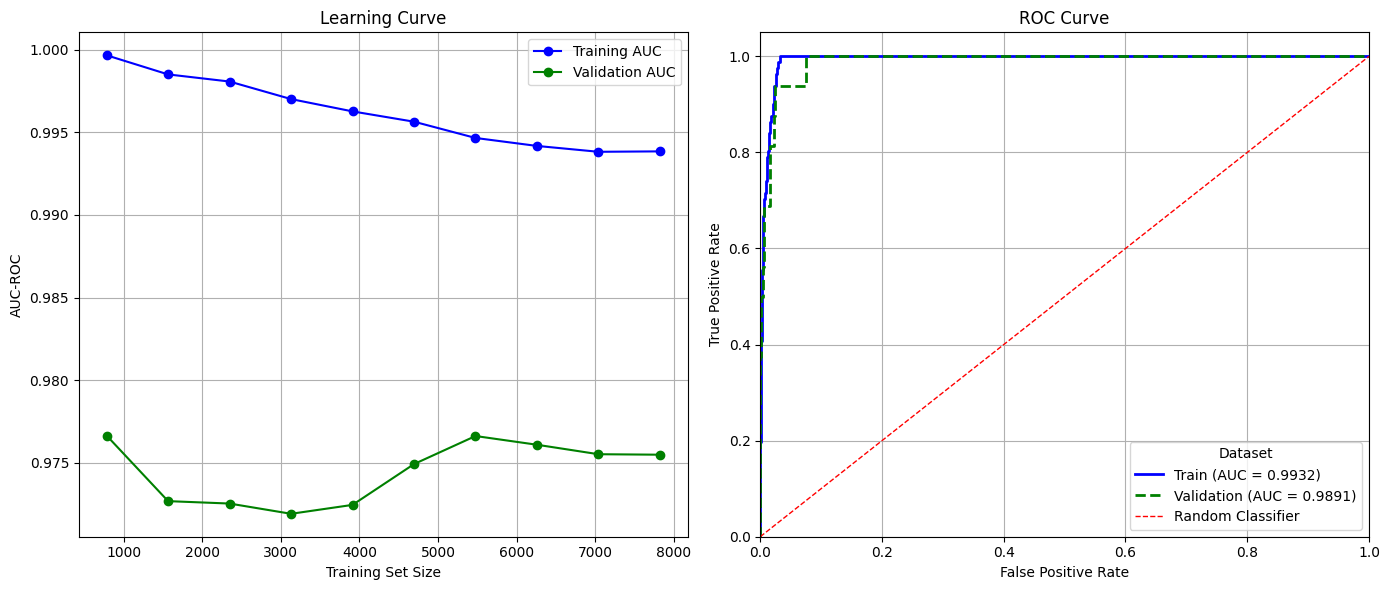

In [51]:
# Import roc_curve and learning_curve from sklearn
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_rf_model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Compute ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

fpr_val, tpr_val, _ = roc_curve(y_val, y_proba_val)
roc_auc_val = roc_auc_score(y_val, y_proba_val)


# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Learning Curve
ax[0].plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training AUC')
ax[0].plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation AUC')
ax[0].set_xlabel('Training Set Size')
ax[0].set_ylabel('AUC-ROC')
ax[0].set_title('Learning Curve')
ax[0].legend()
ax[0].grid(True)

# ROC Curve
ax[1].plot(fpr_train, tpr_train, color='blue', lw=2, linestyle='-', label=f'Train (AUC = {roc_auc_train:.4f})')
ax[1].plot(fpr_val, tpr_val, color='green', lw=2, linestyle='--', label=f'Validation (AUC = {roc_auc_val:.4f})')
ax[1].plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Classifier')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend(title='Dataset', loc='lower right')
ax[1].grid(True)

plt.tight_layout()

In [52]:
# Get probabilities for the positive class from best model for the test dataset(X_test)
rf_test_probs = best_rf_model.predict_proba(X_test)[:, 1]

In [53]:
# Create output DataFrame with player_id and baseline probabilities
rf_output_df = pd.DataFrame({
    'player_id': y_test['player_id'],
    'drafted': rf_test_probs
})

In [54]:
# Save to CSV
rf_output_df.to_csv("../predictions_shash/test_predictions_rf.csv", index=False)

In [55]:
model_performance_explanations = """
The Random Forest model performed strongly, with a cross-validated ROC AUC of ~0.98 and 96.97% 
validation accuracy. It showed excellent class separation (AUC = 0.9891) and high recall (93.8%) 
for drafted players, ensuring few true prospects are missed. 

While precision for the drafted class was low (~17%) due to class imbalance, the high recall and 
AUC make it effective as a screening tool. Random Forest also generalized well, reducing 
overfitting compared to a single decision tree, making it a solid baseline for further refinement.
"""


In [56]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

In [57]:
# Feature importance analysis
features = X_train.columns
importances = best_rf_model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

In [58]:
print("Feature Importances:")
print(feat_df)

Feature Importances:
          Feature  Importance
13         porpag    0.199578
15           gbpm    0.150821
14            bpm    0.134477
17            pts    0.123837
19  Height_Impact    0.121867
16            blk    0.051243
2             usg    0.044319
0              GP    0.042050
1            Ortg    0.035094
8        twoP_per    0.014394
18      height_cm    0.011720
4         DRB_per    0.010062
20        REB_per    0.008666
6          TO_per    0.008438
21  FT_efficiency    0.008168
12            ftr    0.006845
9             TPM    0.006195
7          FT_per    0.005912
3         ORB_per    0.005519
11        stl_per    0.004593
5         AST_per    0.003430
10         TP_per    0.002772


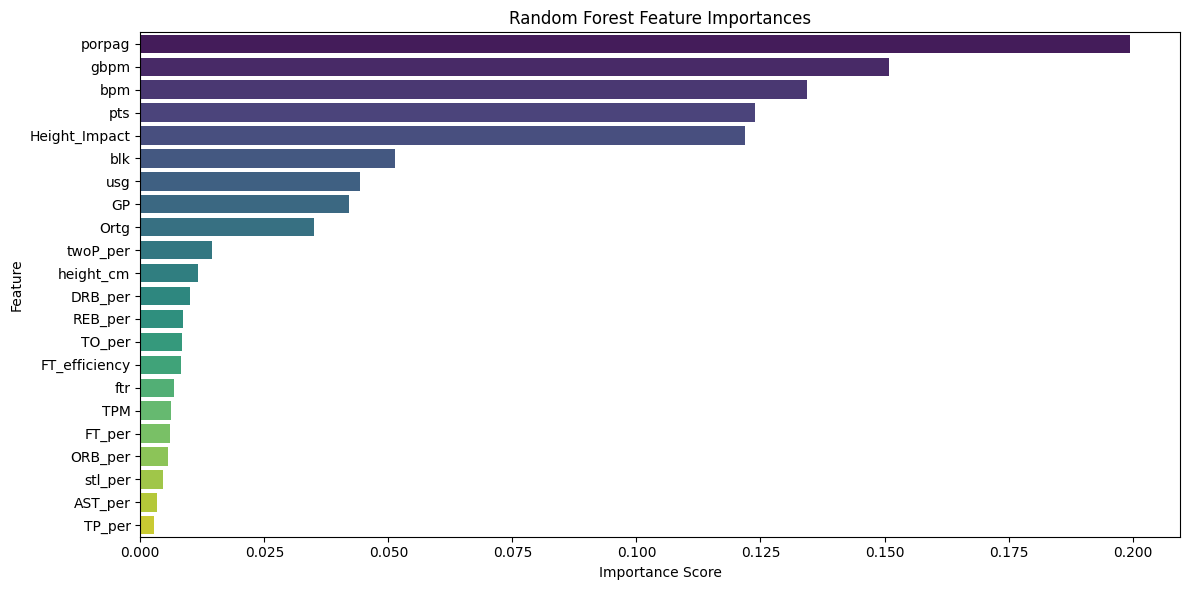

In [59]:
# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

In [60]:
business_impacts_explanations = """
The model shows that advanced performance metrics such as PORPAG, BPM, GBPM, and scoring ability 
(PTS) are the strongest predictors of draft success. This aligns well with business objectives, as 
it highlights measurable on-court impact rather than raw statistics alone. Height-adjusted metrics 
(Height_Impact) also play a significant role, reinforcing the value of considering physical profile 
in scouting.  

From a business perspective, the high recall (93.8%) means the system is very effective at flagging 
true prospects, reducing the risk of overlooking future stars. This minimizes opportunity cost for 
scouts and teams. However, lower precision (~17%) implies many false positives: scouts may spend 
extra time reviewing non-drafted players. While this increases workload, it is less costly than 
missing top talent, and can be optimized later via threshold tuning.  

"""


In [61]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

---
## H. Project Outcomes

In [62]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [63]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [64]:
experiment_results_explanations = """
The experiment confirmed the hypothesis that a Random Forest model outperforms a Decision Tree Classifier 
by better capturing non-linear patterns and interactions in player statistics. Random Forest achieved 
higher accuracy and more stable predictions, while also providing interpretable feature importance scores.

New insights:
- Metrics like PORPAG, GBPM, BPM, and PTS were found to be the most influential, confirming their 
  critical role in assessing player impact.
- Height and defensive stats (BLK, REB_per, Height_Impact) also contributed meaningfully, showing 
  that physical attributes complement performance metrics.
- Some stats like TP_per, AST_per, and STL_per had very low importance, suggesting they add little 
  incremental value in predicting player performance.

Next steps:
1. Optimize the LightGBM model by tuning key hyperparameters (learning_rate, max_depth, n_estimators, num_leaves, min_child_samples, subsample, colsample_bytree) to improve generalization and prevent overfitting (expected uplift: high).  
2. Incorporate class balancing techniques (scale_pos_weight, SMOTE, or class weighting) to better capture minority classes such as underrepresented drafted players (expected uplift: medium-high).  
3. Leverage LightGBM’s built-in feature importance to identify which player attributes contribute most to draft predictions, enabling interpretable, data-driven insights for scouts (expected uplift: medium).  
4. Experiment with early stopping and cross-validation to prevent overfitting and ensure model stability across folds (expected uplift: medium).

"""

In [65]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)